# Import Modules
You may need to install some of them.
But if you activate the environment inside this `examples` folder, all dependencies should be included.

In [3]:
using Pkg
Pkg.instantiate()

Precompiling project...
  ✓ DeconvOptim
  1 dependency successfully precompiled in 5 seconds (256 already precompiled)


In [8]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

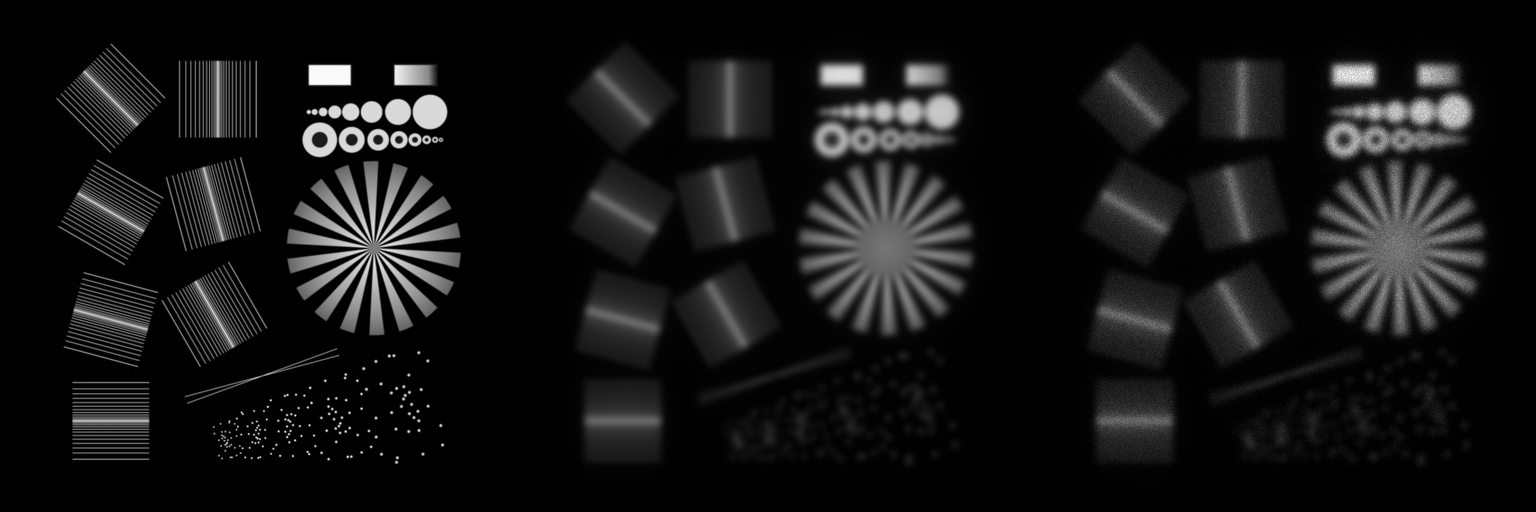

In [15]:
# load test images
img = Float32.(testimage("resolution_test_512"))

psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = conv(img, psf, [1, 2])
img_n = poisson(img_b, 300);

reg = GR()

h_view(img, img_b, img_n)

# Changing the loss function

  0.135412 seconds (2.93 k allocations: 204.231 MiB)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     8.970760e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.40e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.54e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.85e+01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.06e-02 ≰ 0.0e+00
    |g(x)|                 = 9.54e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10
    f(x) calls:    13
    ∇f(x) calls:   11

  0.119003 seconds (3.16 k allocations: 266.236 MiB, 4.80% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.113775e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.47e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.84e-02 ≰ 0.0e+00
    |f(x) - f(x

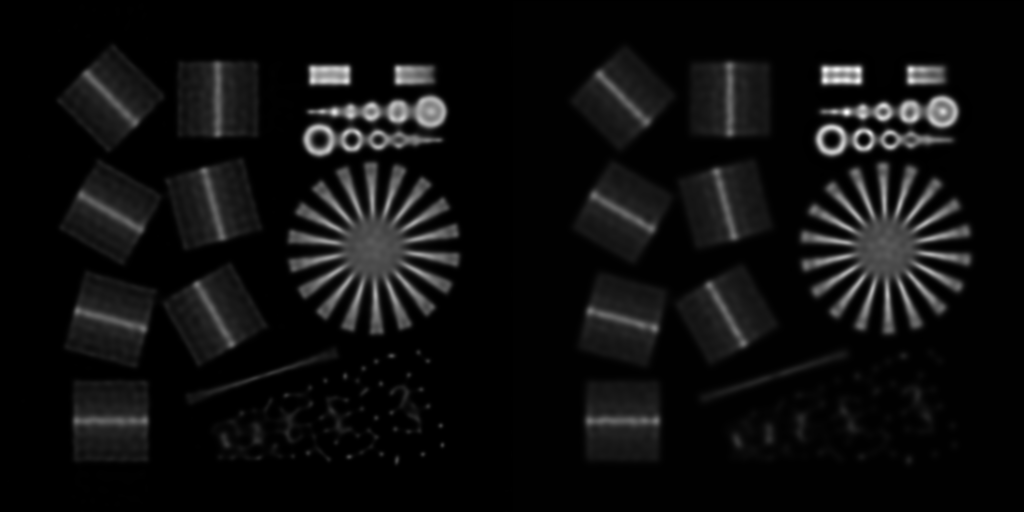

In [18]:
@time resP, optim_res = deconvolution(img_n, psf, loss=Poisson(), regularizer=reg, iterations=10)
@show optim_res

@time resG, optim_res = deconvolution(img_n, psf, loss=Gauss(), regularizer=reg, iterations=10)
@show optim_res

h_view(resP, resG)